<a href="https://colab.research.google.com/github/tejaswinirb1/ML_observations/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('testdata.csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

In [4]:
linreg = LinearRegression()
linreg.fit(temperature, preasure) #fit the model

LinearRegression()

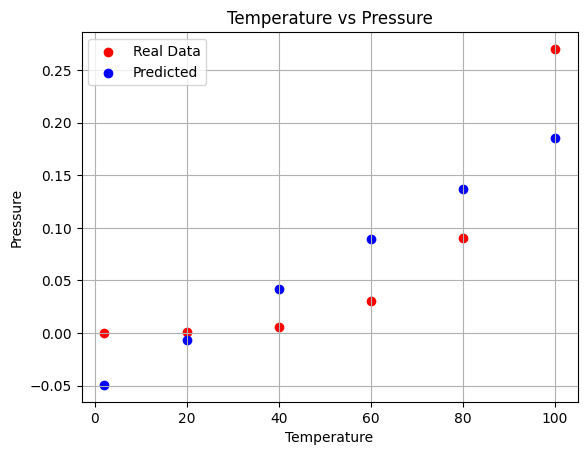

In [5]:
#predict the output
predicted = linreg.predict(temperature)
#plot the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted, color='blue')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

In [6]:

# Display the coefficients and intercept
print(f"Coefficient (slope): {linreg.coef_[0]}")
print(f"Intercept: {linreg.intercept_}")

Coefficient (slope): 0.0023902890739833406
Intercept: -0.05407788339049481


In [7]:
# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(preasure, predicted)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.047339461048505636


In [8]:
#predict the output for new given data ie given temperature is 30

given_temperature = np.array([[30]])
predicted_pressure = linreg.predict(given_temperature)
print(f"Predicted pressure for the given temperature {given_temperature[0][0]}: {predicted_pressure[0]}")


Predicted pressure for the given temperature 30: 0.017630788829005414


In [9]:
# Using the coefficients and intercept to predict the pressure for a temperature of 30

predicted_pressure_compute =  linreg.coef_[0] * given_temperature+ linreg.intercept_
print(f"predicted pressure computed using coefficient and intercept: {predicted_pressure_compute}")

predicted pressure computed using coefficient and intercept: [[0.01763079]]


# Activity to do:

1. Display the coefficients and intercept <br>
2. Implement Linear Regression on Boston Housing Data to demonstrate multiple linear regression <br>
3. Use the obtained coefficent and intecept to compute new_pressure for new_temperature = 40 and verify the result by executing the relevant code block <br>
4. Implement other evaluation metrics: MSE, RMSE, RelMSE and CV

1.Display the coefficients and intercept

In [10]:
# Display the coefficients and intercept
print(f"Coefficient (slope): {linreg.coef_[0]}")
print(f"Intercept: {linreg.intercept_}")

Coefficient (slope): 0.0023902890739833406
Intercept: -0.05407788339049481


2.Implement Linear Regression on Boston Housing Data to demonstrate multiple linear regression

In [12]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/BostonHousingData (1).csv')

# Display first few rows
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['MEDV'])  # all features
y = data['MEDV']                 # target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the desired strategy
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'

# Fit the imputer on your training data and transform it
X_train = imputer.fit_transform(X_train)

# Now you can fit the model
model.fit(X_train, y_train)

LinearRegression()

Use the obtained coefficent and intecept to compute new_pressure for new_temperature = 40 and verify the result by executing the relevant code block
Implement other evaluation metrics: MSE, RMSE, RelMSE and CV

In [17]:
# Let's say the feature is 'TEMP' - Replace with the actual column name from your dataset
# Replace 'TEMP' with 'TAX'
feature_index = X.columns.get_loc('TAX')  # Find index of 'TAX'
new_temperature = 40

# Create a new data row (you'll need to fill other features with reasonable defaults or means)
new_data = X.mean().to_numpy()
new_data[feature_index] = new_temperature

# Predict manually
manual_prediction = model.intercept_ + sum(coef * val for coef, val in zip(model.coef_, new_data))
print("Manual Prediction:", manual_prediction)

# Predict using model
import numpy as np
new_data_reshaped = np.array(new_data).reshape(1, -1)
model_prediction = model.predict(new_data_reshaped)[0]
print("Model Prediction:", model_prediction)

Manual Prediction: 25.82853252854071
Model Prediction: 25.82853252854071


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.impute import SimpleImputer

# Create an imputer object with the desired strategy
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'

# Fit the imputer on your training data and transform it
X_train = imputer.fit_transform(X_train)

# Now you can fit the model
model.fit(X_train, y_train)

# Apply the same imputation strategy to X_test before prediction
X_test = imputer.transform(X_test) #This line was added to fix the error. Use the trained imputer to transform X_test to handle missing values

# Predictions
y_pred = model.predict(X_test)



# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Relative MSE
relmse = np.mean(((y_test - y_pred) / y_test) ** 2)
print("Relative MSE:", relmse)

# Coefficient of Variation (CV)
cv = rmse / np.mean(y_test)
print("Coefficient of Variation (CV):", cv)


Mean Squared Error (MSE): 25.002388923514886
Root Mean Squared Error (RMSE): 5.000238886644806
Relative MSE: 0.08244114113494673
Coefficient of Variation (CV): 0.23269658109214814


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
